# Tarea 6
Códigos referencia del libro Hands-On Machine Learning with Scikit-Learn and Tensor Flow 2017 (Cap 3) -- Aurélien Géron
## clasificadores lineales 

### conceptos básicos
La representación más simple de una función discriminante lineal se obtiene al tomar una función lineal del vector de entrada para que

$$y(x)=w^{T}x+w_{0}$$

donde $ w$ se denomina vector de ponderación, y $w0$ es un sesgo (no debe confundirse con sesgo en el sentido estadístico). El negativo del sesgo a veces se llama un umbral. Un vector de entrada $x$ se asigna a la clase $C_{1}$ si $y(x)\geq 0$ y a la clase $C_2$ de lo contrario. Por lo tanto, el límite de decisión correspondiente se define por la relación $y (x) = 0$, que corresponde a un hiperplano dimensional $(D - 1)$ dentro del espacio de entrada de dimensión $D$. Considere dos puntos $xA y xB$, ambos de los cuales se encuentran en la superficie de decisión. Como$ y (xA) = y (xB) = 0$, tenemos $ w^T (x_A −x_B) = 0 $ y, por lo tanto, el vector $w$ es ortogonal a cada vector que se encuentra dentro de la superficie de decisión, por lo que $w $determina la orientación de la superficie de decisión. De manera similar, si $x$ es un punto en la superficie de decisión, entonces $y (x) = 0$, entonces la distancia normal desde el origen hasta la superficie de decisión viene dada por<a href="http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf">[Bishop]</a>

$$||x|| \Longleftrightarrow y (x) = 0$$

$$min_x ||x||\Longleftrightarrow st y (x) = 0\Longleftrightarrow L(x,y)=x^{T}x-\lambda y(x)$$
$$L(x,y)=x^{T}x-\lambda (w^{T}x+b)$$
$$\frac{\partial L}{\partial x}=2x-\lambda w=0$$
$$\frac{\partial L}{\partial \lambda }=w^{T}x+b=0$$
resuelvo $w^{T}x=-b$
$$w^{T}x=-b$$
$$ww^{T}x=-wb$$
$$x=-(ww^{T})^{-1}wb$$

resuelvo $2x-\lambda w=0$
$$2x-\lambda w=0$$
$$\frac{\lambda w}{2}=x$$

igualo 
$$\frac{\lambda w}{2}=-(ww^{T})^{-1}wb$$
$$\frac{\lambda ww^{T}}{2}=-b(ww^{T})^{-1}ww^{T} $$
$$\frac{\lambda}{2}=-b(ww^{T})^{-1} $$

necesitamos es hacer una proyección del punto al origen
$$\hat{x}=rw$$
$$\varepsilon(r)=||x-\hat{x}||$$
$$\varepsilon(r)=||x-rw||$$
$$\varepsilon(r)=x^{T}x+2rw^{T}x+r^2+ww^{T}$$
$$\frac{\partial \varepsilon(r)}{\partial r}=-2w^{T}x+2rw^{T}w=0$$
$$r=\frac{w^{T}x}{||w||^2}$$
$$proj_wx =rw  ;r=\frac{w^{T}x}{||w||^2}$$

$$||proj_wx|| =||rw||  $$
$$||proj_wx|| =(r^2 ww^{T})^{\frac{1}{2}}$$
$$||proj_wx|| =r( ||w||^2)^{\frac{1}{2}}$$
$$||proj_wx|| =r||w||$$
$$||proj_wx|| =\frac{w^{T}x}{||w||^2}||w||$$
$$||proj_wx|| =\frac{w^{T}x}{||w||}$$
$$y (x) = w^Tx + b=0 $$
$$w^Tx =-b$$
$$||proj_wx|| =\frac{-b}{||w||}$$

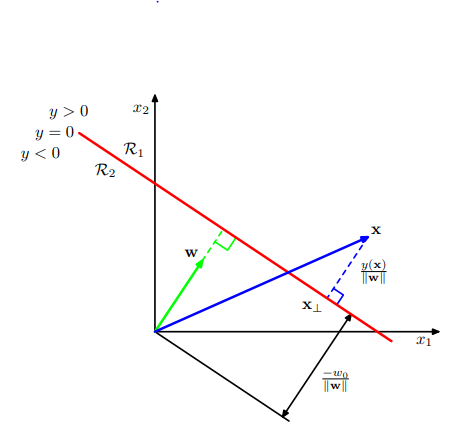

In [1]:
from IPython.display import Image
Image(filename='ilus.png')



$$y(x_A)=y(x_B)=0$$
$$w^{T}x_A+b=w^{T}x_B+b=0$$
$$w^{T}(x_A+x_B)=0$$
un punto arbitrario $x$ y sea$ x_{\perp }$ su proyección ortogonal sobre la superficie de decisión, de modo que<a href="http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf">[Bishop]</a>

$$||x+y(x)||=?$$
$$x=x_{\perp }+\frac{rw}{||w||}$$

Multiplicando ambos lados de este resultado por w^T y agregando b, y haciendo uso de$ y (x) = w^Tx + b $ y $y (x_{\perp }) = w^Tx_{\perp } + b = 0$, tenemos<a href="http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf">[Bishop]</a>
$$w^Tx + b=w^Tx_{\perp } + b +\frac{rww^T}{||w||}$$ 
el plano evulado en ese punto ortogonal como muestra la figura es y (x_{\perp })=0
$$y(x)= y (x_{\perp })+\frac{||w||^2}{||w||}$$
$$y(x)= r||w||$$
$$r= \frac{y(x)}{||w||}$$


### Function discriminant fisher
$$M_1=\frac{1}{N_1}\sum_{NC_1}X_N $$
$$M_2=\frac{1}{N_2}\sum_{NC_2}X_N $$
media 
$$M_{1w}=w^TM_1$$
$$M_{2w}=w^TM_2$$
$$M_{1w}-M_{2w}=w^T(M_1-M_2)$$
varianza
$$S^2_1=\sum_{NC_1}(w^Tx_N -M_{1w})^2 $$
$$J(w)=\frac{(M_{2w}-M_{1w})^2}{S^2_1+S^2_2} $$
$$(M_{2w}-M_{1w})^2=(w^TM_2-w^TM_2)^2$$
$$(w^TM_2-w^TM_2)^2=(w^T(M_1-M_2))^2$$
$$(w^T(M_1-M_2))^2=w^T(M_1-M_2)(M_1-M_2)^Tw$$
$$w^T(M_1-M_2)(M_1-M_2)^Tw=w^TS_bw$$


$$S^2_k=\sum_{NC_k}(w^Tx_N -M_{kw})^2 $$
$$S^2_k=\sum_{NC_k}(w^Tx_N -w^TM_k)^2 $$
$$S^2_k=\sum_{NC_k}(w^T(x_N-M_K))^2$$
$$S^2_k=\sum_{NC_k}w^T(x_N-M_K)(x_N-M_K)^Tw$$
$$S^2_k=w^T\sum_{NC_k}(x_N-M_K)(x_N-M_K)^Tw$$
$$S^2_k=w^TS_Kw$$

$$J(w)=\frac{w^TS_bw}{w^TS_ww} $$
$$S_w=S_1+S_2 $$
$$w^*=armax_wJ(w)$$

$$\frac{\partial J(w)}{\partial w}=\frac{\frac{\partial }{\partial w}(w^TS_bw)w^TS_ww-\frac{\partial }{\partial w}(w^TS_ww)w^TS_bw}{(w^TS_ww)^2}=0$$
$$\frac{\partial J(w)}{\partial w}=2S_bw(w^TS_ww)-2S_ww(w^TS_bw)=0$$

$$w^TS_wwS_bw-w^TS_bwS_ww=0$$
$$\frac{w^TS_wwS_bw}{w^TS_ww}-\frac{w^TS_bwS_ww}{w^TS_ww}=0$$
$$S_bw-\frac{w^TS_bwS_ww}{w^TS_ww}=0$$
$$\lambda=\frac{w^TS_bw}{w^TS_ww}$$
$$S_bw-\lambda S_ww=0$$
eig generalizado
$$S_bw=\lambda S_ww$$
si $S^{-1}_w$ existe
$$S^{-1}_wS_bw=\lambda w$$

$$S_bw=(M_1-M_2)(M_1-M_2)^Tw=$$
$$\alpha=(M_1-M_2)^Tw $$
$$\alpha=(M_1-M_2)^Tw $$
$$S^1_w\alpha(M_1-M_2)=\lambda w$$
$$w\alpha S^1_w\alpha(M_1-M_2)$$




# Training and Cost Function

Bien, ahora sabes cómo un modelo de regresión logística estima las probabilidades y hace predicciones.¿Pero cómo se entrena? El objetivo del entrenamiento es establecer el vector de parámetros $θ$ para que el modelo estime probabilidades altas para casos positivos $(y = 1)$ y bajas probabilidades para casos negativos $(y = 0)$. 
La función de costo en todo el conjunto de entrenamiento es simplemente el costo promedio de todo el entrenamiento. En instancias. Se puede escribir en una sola expresión (como se puede verificar fácilmente), llamada la pérdida de registro, que se muestra en la ecuación .

Logistic Regression cost function (log loss)

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}log\bigg(\hat{p}^{(i)}\bigg)+\bigg(1−y^{(i)}\bigg)log\bigg(1−\hat{p}^{(i)}\bigg)$$
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}log\bigg(h_{\theta}(x^{(i)})\bigg)+\bigg(1−y^{(i)}\bigg)log\bigg(1−h_\theta(x^{(i)})\bigg)$$

la mala noticia es que no se conoce una ecuación de forma cerrada para calcular el valor de $θ$ que minimiza esta función de costo (no hay equivalente de la ecuación normal). Pero la buena noticia es que esta función de costo es convexa, por lo que el Gradient Descent (o cualquier otro) otro algoritmo de optimización) está garantizado para encontrar el mínimo global (si el aprendizaje La tasa de entrada no es demasiado grande y se espera el tiempo suficiente).

$$ \frac{\partial J(\theta)}{\partial \theta_j}=\frac{\partial }{\partial \theta_j} -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}log\bigg(h_\theta(x^{(i)})\bigg)+\bigg(1−y^{(i)}\bigg)log\bigg(1−h_\theta(x^{(i)})\bigg)$$

por linealidad 

$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}\frac{\partial }{\partial \theta_j}log\bigg(h_\theta(x^{(i)})\bigg)+\bigg(1−y^{(i)}\bigg)\frac{\partial }{\partial \theta_j}log\bigg(1−h_\theta(x^{(i)})\bigg)\bigg]$$

al utiliza regla de la cadena

$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}\frac{\frac{\partial }{\partial \theta_j}h_\theta(x^{(i)})}{h_\theta(x^{(i)})}+\bigg(1−y^{(i)}\bigg)\frac{\frac{\partial }{\partial \theta_j}\bigg(1−h_\theta(x^{(i)})\bigg)}{1−h_\theta(x^{(i)})}\bigg]$$

$$h_\theta(x)=\sigma(\theta^⊤ x^{(i)})$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}
\frac{\frac{\partial }{\partial \theta_j}\sigma(\theta^⊤ x^{(i)})}{\sigma(\theta^⊤x^{(i)})}+\bigg(1−y^{(i)}\bigg)\frac{\frac{\partial }{\partial \theta_j}\bigg(1−\sigma(\theta^⊤ x^{(i)})\bigg)} {1−\sigma(\theta^⊤ x^{(i)})}\bigg]$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}\frac{\sigma(\theta^⊤ x^{(i)})(1-\sigma(\theta^⊤ x^{(i)}))\frac{\partial }{\partial \theta_j}(\theta^⊤ x^{(i)})}
{\sigma(\theta^⊤x^{(i)})}-\bigg(1−y^{(i)}\bigg)\frac{\sigma(\theta^⊤ x^{(i)})(1-\sigma(\theta^⊤ x^{(i)}))\frac{\partial }{\partial \theta_j}(\theta^⊤ x^{(i)})}
{1-\sigma(\theta^⊤x^{(i)})}\bigg]$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}\frac{h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))\frac{\partial }{\partial \theta_j}(\theta^⊤ x^{(i)})}
{h_\theta(x^{(i)})}-\bigg(1−y^{(i)}\bigg)\frac{h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))\frac{\partial }{\partial \theta_j}(\theta^⊤ x^{(i)})}
{1-h_\theta(x^{(i)})}\bigg]$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}
(1-h_\theta(x^{(i)}))\frac{\partial }{\partial \theta_j}(\theta^⊤ x^{(i)})
-\bigg(1−y^{(i)}\bigg)h_\theta(x^{(i)})\frac{\partial }{\partial \theta_j}(\theta^⊤ x^{(i)})
\bigg]$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}
(1-h_\theta(x^{(i)})) x^{(i)}_j
-\bigg(1−y^{(i)}\bigg)h_\theta(x^{(i)})) x^{(i)}_j\bigg]$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}
(1-h_\theta(x^{(i)}))
-\bigg(1−y^{(i)}\bigg)h_\theta(x^{(i)})\bigg]x^{(i)}_j$$


$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}
-y^{(i)}h_\theta(x^{(i)})
-h_\theta(x^{(i)})+y^{(i)}h_\theta(x^{(i)})\bigg]x^{(i)}_j$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}= -\frac{1}{m}\sum_{i=1}^{m} \bigg[y^{(i)}
-h_\theta(x^{(i)})\bigg]x^{(i)}_j$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}= \frac{1}{m}\sum_{i=1}^{m} \bigg[
\sigma(\theta^⊤ x^{(i)})-y^{(i)}\bigg]x^{(i)}_j$$

# Cross Entropy 
La entropía cruzada se originó a partir de la teoría de la información. Supongamos que usted quiere eficientemente Transmite información sobre el clima todos los días. Si hay ocho opciones (soleado, lluvioso, etc.), podría codificar cada opción usando 3 bits desde 23 = 8. Sin embargo, si Creo que estará soleado casi todos los días, sería mucho más eficiente codificar "Soleado" en un solo bit (0) y las otras siete opciones en 4 bits (comenzando con un 1). La entropía cruzada mide el número promedio de bits que realmente envía por opción. Si su suposición sobre el clima es perfecta, la entropía cruzada será igual a la La entropía del clima en sí (es decir, su imprevisibilidad intrínseca). Pero si tu asume- Las condiciones son incorrectas (por ejemplo, si llueve con frecuencia), la entropía cruzada será mayor en una cantidad Llamado la divergencia Kullback-Leibler.

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k log(\hat{p}^{(i)}_k) $$
$$\hat{p}^{(i)}_k=\frac{exp({\theta^⊤_k x^{(i)})}}{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}} $$

$$log(\hat{p}^{(i)}_k)=log\bigg(\frac{exp({\theta^⊤_k x^{(i)})}}{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}\bigg)$$

$$log(\hat{p}^{(i)}_k)=log (exp({\theta^⊤_k x^{(i)})})-log{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}\bigg)$$
$$log(\hat{p}^{(i)}_k)={\theta^⊤_k x^{(i)}}-log{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}$$

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \bigg({\theta^⊤_k x^{(i)}}-log{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}\bigg)$$

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \frac{\partial }{\partial \theta_{j\ell}}\bigg({\theta^⊤_k x^{(i)}}-log{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}\bigg)$$

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \bigg({ \delta_{kj} x^{(i)}_\ell}-\frac{\partial }{\partial \theta_{j\ell}}log{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}\bigg)$$

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \bigg({ \delta_{kj} x^{(i)}_\ell}-\frac{\frac{\partial }{\partial \theta_{j\ell}}\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}\bigg)$$

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \bigg({ \delta_{kj} x^{(i)}_\ell}-\frac{\sum_{k=1}^{k}\frac{\partial }{\partial \theta_{j\ell}}exp({\theta^⊤_k x^{(i)})}}{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}\bigg)$$


$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \bigg({ \delta_{kj} x^{(i)}_\ell}-\frac{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})\frac{\partial }{\partial \theta_{j\ell}}(\theta^⊤_k x^{(i)})}}{\sum_{k=1}^{k}exp({\theta^⊤_\alpha x^{(i)})}}\bigg)$$


$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \bigg({ \delta_{kj} x^{(i)}_\ell}-\frac{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})(\delta_{kj} x^{(i)}_\ell)}}{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}\bigg)$$

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \bigg({ \delta_{kj} x^{(i)}_\ell}-\frac{exp({\theta^⊤_j x^{(i)})(x^{(i)}_\ell)}}{\sum_{k=1}^{k}exp({\theta^⊤_k x^{(i)})}}\bigg)$$


$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \bigg({ \delta_{kj} x^{(i)}_\ell}-x^{(i)}_\ell\hat{p}^{(i)}_j\bigg)$$

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^{(i)}_k \bigg({ \delta_{kj} }-\hat{p}^{(i)}_j\bigg)x^{(i)}_\ell$$

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= -\frac{1}{m}\sum_{i=1}^{m}x^{(i)}_\ell\sum_{k=1}^{k}y^{(i)}_k \bigg[{ \delta_{kj} }-\hat{p}^{(i)}_j\bigg]$$


$$ \sum_{k=1}^{k}y^{(i)}_k \bigg[{ \delta_{kj} }-\hat{p}^{(i)}_j\bigg]=y^{(i)}_j \bigg[\hat{p}^{(i)}_j-1\bigg]+\sum_{k\neq j} y^{(i)}_k \hat{p}^{(i)}_j=\hat{p}^{(i)}_j\bigg(y^{(i)}_j+\sum_{k\neq j} y^{(i)}_k\bigg)-y^{(i)}_j$$

$y$ Es un vector codificado  para las etiquetas, asi que $\sum_{k} y^{(i)}_k=1 $and $y^{(i)}_j+\sum_{k\neq j} y^{(i)}_k=1$.Entonces tenemos
$$ \sum_{k=1}^{k}y^{(i)}_k \bigg[{ \delta_{kj} }-\hat{p}^{(i)}_j\bigg]=\hat{p}^{(i)}_j-y^{(i)}_j$$

$$ \frac{\partial J(\theta)}{\partial \theta_{j\ell}}= \frac{1}{m}\sum_{i=1}^{m}x^{(i)}\bigg[\hat{p}^{(i)}_j-y^{(i)}_j\bigg]$$

## Naive Bayes
El clasificador Naive Bayes agrega información usando la probabilidad condicional con un supuesto de independencia entre las características . Qué significa eso? Por ejemplo, significa que debemos asumir que los años de un jugador son independientes de su efectividad en el campo de fútbol. Esta suposición es absolutamente errónea y es por eso que se llama ingenua . Permite simplificar el cálculo, incluso en conjuntos de datos muy grandes. Veamos por qué.<a href="https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44">[2]</a>

El clasificador Naive Bayes se basa en la búsqueda de funciones que describen la probabilidad de pertenecer a una clase dada características . Lo escribimos $P( y | x_1,…, x_n)$. Aplicamos la ley de Bayes para simplificar el cálculo<a href="https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes">[2]</a>

$$P( y | x_1,…, x_n)=\frac{P(y)P(x_1,…, x_n|y)}{ P(x_1,…, x_n)}$$

Usando la ingenua suposición de independencia condicional que

$$P(x_i |y, x_1,…,x_{i-1},x_{i+1},…,x_n)=P(x_{i}| y)$$

para todos i , esta relación se simplifica a
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$
                                 
Ya que $P(x_1, \dots, x_n)$ es constante dada la entrada, podemos usar la siguiente regla de clasificación:

$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

y podemos usar la estimación Máxima A Posteriori (MAP) para estimar$ P (y)$ y $P(x_i \mid y)$; el primero es entonces la frecuencia relativa de la clase y en el conjunto de entrenamiento. 

Los diferentes clasificadores de Bayes ingenuos difieren principalmente por los supuestos que hacen con respecto a la distribución de $P(x_i \mid y)$.

NB : un error común es considerar las salidas de probabilidad del clasificador como verdaderas . De hecho, Naive Bayes es conocido como un mal estimador , por lo que no tome esos resultados probabilísticos demasiado en serio.<a href="https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44">[2]</a>



Queda un último paso para comenzar a implementar un clasificador. ¿Cómo modelar las funciones de probabilidad$ P (x_i  \mid y)? Hay tres modelos disponibles en la biblioteca de Sklearn python:

- Gauss: asume que las características continuas siguen una distribución normal .

![alt-text-1](https://sites.google.com/site/nuclearremotelaboratory/_/rsrc/1395412565275/prepare-the-samples/lesson-1/exp-1-roadsite-plants/analyze-data/gaussian-distribution/bell%20curve.png)

<h2 align="right"></h2> 

- Multinomial : es útil si sus características son discretas.
- Bernoulli : el modelo binomial es útil si sus características son binarias.




## Conditions for the Optimality of Naive Bayes

Condiciones para la optimidad de los Bayes ingenuos En la sección, propusimos que los Bayes ingenuos son óptimos si las dependencias entre los atributos se anulan entre sí. Es decir, bajo circunstancias, el ingenuo Bayes sigue siendo óptimo, aunque existan dependencias. En esta sección, investigamos a los Bayes ingenuos bajo la distribución gaussiana multivariada y demostramos una condición suficiente para la optimidad de los Bayes ingenuos, asumiendo que las dependencias entre los atributos existen. Eso nos proporciona evidencia teórica de que las dependencias entre los atributos pueden cancelarse mutuamente. Limitemos nuestra discusión a dos atributos X1 y X2, y asumamos que la densidad de clase es un Gaussiano multivariado en las clases positivas y negativas. 

# Configuraciones básicas

Preparar módulos de Python:

In [31]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "imagesAM", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Iris flower data set  : "Hello world" de clasificación 
Vamos a usar el conjunto de datos del iris para ilustrar la regresión logística. Este es un famoso conjunto de datos que contiene la longitud del sépalo y pétalo y el ancho de 150 flores de iris de tres diferentes especies: Iris-Setosa, Iris-Versicolor e Iris-Virginica (ver Figura 4-22)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
# fitting the Naive bayes classifier to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
# predicting the test set result
y_pred = classifier.predict(x_test)
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

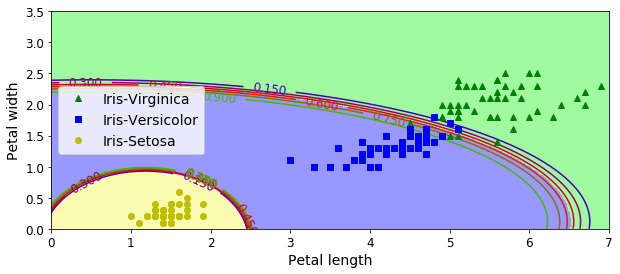

In [21]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = classifier.predict_proba(X_new)
y_predict = classifier.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.show()


# Stochastic Gradient Descent

Dado un conjunto de ejemplos de entrenamiento $(x_1,y_1),…,(x_n,y_n)$ donde $x_i\in R^m$ y $y_i\in(-1,1)$, nuestro objetivo es aprender una función  lineal $f(x)=w^Tx+b$ con parámetros $w\in R^m$ de modelo e intercepción$b\in R$ . Para hacer predicciones, simplemente miramos el signo de$f(x)$ . Una opción común para encontrar los parámetros del modelo es minimizar el error de entrenamiento regularizado dado por

$$ E(w,b)= \frac{1}{n}\sum_{i=1}^{n}L(y_i,f(x_i))+\alpha R(w)$$

Donde L es una función de pérdida que mide el ajuste (mal) del modelo y R es un término de regularización (también conocido como penalización) que penaliza la complejidad del modelo; Es un hiperparámetro no negativo..

Diferentes opciones para L conllevar diferentes clasificadores, tales como

- Hinge: (soft-margin) Support Vector Machines.
- Log: Logistic Regression.
- Least-Squares: Ridge Regression.
- Epsilon-Insensitive: (soft-margin) Support Vector Regression.

Todas las funciones de pérdida  anteriores se pueden considerar como un límite superior en el error de clasificación errónea (pérdida cero-uno) 

Las opciones populares para el término de regularización $R$ incluyen:

- L2 norm:$R(w):=\frac{1}{2}\sum_{i=1}^{n} w^{2}_i$ 
- L1 norm:$R:=\sum_{i=1}^{n} |w_i|$ , which leads to sparse solutions.
- Elastic Net: , a convex combination of L2 and L1, where  is given by 1 - l1_ratio.

The Figure below shows the contours of the different regularization terms in the parameter space when .

En el descenso de gradiente estocástico, en lugar de dar un paso al calcular el gradiente de la función de pérdida que se crea al sumar todas las funciones de pérdida, damos un paso al calcular el gradiente de la pérdida de solo un ejemplo muestreado aleatoriamente (sin reemplazo). En contraste con el descenso de gradiente estocástico , donde cada ejemplo se elige de forma estocástica, nuestro enfoque anterior procesó todos los ejemplos en un solo lote y, por lo tanto, se conoce como descenso de degradado por lotes.

$$h_\theta(x)=\sum_{j=0}^{n}\theta_j x_j $$
$$cost(\theta,(x^{(i)},y^{(i)}))=\frac{1}{2}(h_\theta(x^{(i)})-y^{(i)})^{2} $$
loss function 

$$ J_{train}(\theta)= \frac{1}{m}\sum_{i=1}^{m}cost(\theta,(x^{(i)},y^{(i)}))$$

El descenso de gradiente estocástico es un método de optimización para problemas de optimización sin restricciones. En contraste con el descenso de gradiente (por lotes), SGD se aproxima al gradiente verdadero de considerando un solo ejemplo de entrenamiento a la vez.

La clase SGDClassifierimplementa una rutina de aprendizaje SGD de primer orden. El algoritmo se repite en los ejemplos de capacitación y para cada ejemplo actualiza los parámetros del modelo de acuerdo con la regla de actualización dada por

$$ w= w-\alpha\bigg( \frac{\partial R(w)}{\partial w}+\frac{\partial L(w^Tx_i+b,y_i)}{\partial w}\bigg)$$

Esto significa que, en cada paso, estamos tomando el gradiente de una función de pérdida, que es diferente de nuestra función de pérdida real (que es una suma de la pérdida de cada ejemplo). El gradiente de esta "pérdida de un ejemplo" en un particular puede en realidad apuntar en una dirección ligeramente diferente al gradiente de "pérdida de todos los ejemplos".
<a href="https://blog.paperspace.com/intro-to-optimization-in-deep-learning-gradient-descent/">[3]</a>


![alt-text-1](http://www.samvitjain.com/blog/assets/gradient-descent/comparison.png)

<h2 align="right">Ozzie Liu</h2> 



In [22]:

from sklearn.linear_model import SGDClassifier
classifier =SGDClassifier(alpha=0.009, max_iter=100, tol=1e-3)
classifier.fit(x_train, y_train)

SGDClassifier(alpha=0.009, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
# predicting the test set result
y_pred = classifier.predict(x_test)
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


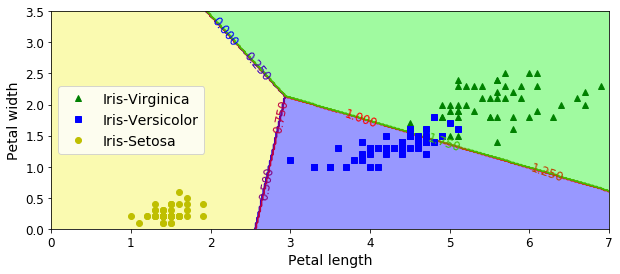

In [24]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_predict = classifier.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.show()


## Linear and Quadratic Discriminant Analysis

Tanto LDA como QDA pueden derivarse de modelos probabilísticos simples que modelan la distribución condicional de clase de los datos$P(X|y=k)$  para cada clase $K $. Las predicciones se pueden obtener utilizando la regla de Bayes
$$P( y=k| X)=\frac{P(X|y=k)P(y=k)}{ P(X)}=\frac{P(X|y=k)P(y=k)}{ \sum_{l}P(X|y=l)P(y=l)}$$
y seleccionamos la clase K lo que maximiza esta probabilidad condicional.

Más específicamente, para el análisis discriminante lineal y cuadrático,P(X|y)  Se modela como una distribución gaussiana multivariable con densidad:

$$P(x) = \frac{1}{{(2\pi)^{\frac{d}{2}}|\Sigma_k|^{\frac{1}{2}} }}exp{\bigg(-\frac{1}{2}(X-\mu_k)^T\Sigma^1_k(X-\mu_k)\bigg)}$$



dónde d Es el número de características.

Para usar este modelo como un clasificador, solo necesitamos estimar a partir de los datos de entrenamiento que la clase tiene antes. $P(y=k)$ (por la proporción de instancias de clase k),la clase significa  $\mu_k$ (por el medio de la clase de muestra empírica) y las matrices de covarianza (ya sea por las matrices de covarianza de la clase de muestra empírica, o por un estimador regularizado: consulte la sección sobre la contracción a continuación).

En el caso de LDA, se supone que los gaussianos de cada clase comparten la misma matriz de covarianza:$\Sigma_k=\Sigma$  para todos k . Esto conduce a superficies de decisión lineales, que se pueden ver comparando las relaciones de probabilidad logarítmica:$log\bigg[\frac{P(y=k| X)}{ P(y=l| X)}\bigg]$


$$log\bigg(\frac{P(y=k| X)}{ P(y=l| X)}\bigg)=log\bigg(\frac{P(X|y=k)P(y=k)}{P(X|y=l)P(y=l)}\bigg)=0 \Longleftrightarrow$$
$$(\mu_k-\mu_l)^T\Sigma^{-1}X=\frac{1}{2}(\mu^T_k\Sigma^{-1}\mu_k-\mu^T_l\Sigma^{-1}\mu_l)-log\frac{P(y=k)}{P(y=l)}
$$

En el caso de QDA, no hay suposiciones en las matrices de covarianza $\Sigma_k$ de los gaussianos, conduciendo a superficies de decisión cuadráticas.

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier =LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
classifier.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

In [26]:
# predicting the test set result
y_pred = classifier.predict(x_test)
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


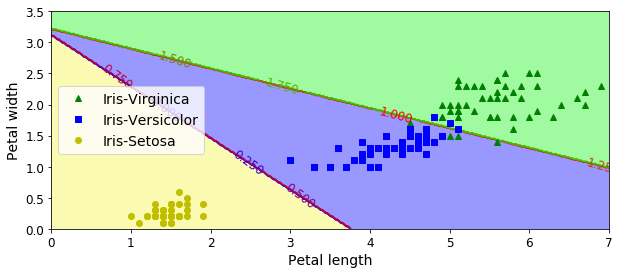

In [27]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_predict = classifier.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.show()


# Quadratic Discriminant Analysis


LDA asume que las observaciones dentro de cada clase se extraen de una distribución gaussiana multivariable con un vector de media específico de la clase, pero una matriz de covarianza que es común a todas las clases K. El análisis discriminante cuadrático proporciona un enfoque alternativo al suponer que cada clase tiene su propia matriz de covarianza $ \Sigma_k $. Para derivar la función de puntuación cuadrática, volvemos a la derivación anterior, pero ahora $ \Sigma_k $ es una función de k, por lo que ya no podemos introducirla en la constante.<a href="https://xavierbourretsicotte.github.io/LDA_QDA.html">[4]</a>
$$p_k(x) = \pi_k \ \frac{1}{(2 \pi)^{p/2} |\Sigma|_k^{1/2}} \exp \left( - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) \right)
$$

 $$\log p_k(x) = C + \log \pi_k - \frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)$$
     
$$ = C + \log \pi_k - \frac{1}{2} \log |\Sigma_k| - \frac{1}{2} x^T \Sigma_k^{-1} x + x^T \Sigma_k^{-1} \mu_k - \frac{1}{2}
\mu_k^T \Sigma_k^{-1} \mu_k
$$
Que es una función cuadrática de x. Bajo esta suposición menos restrictiva, el clasificador asigna una observación $X =x$ a la clase para la cual la función de puntuación cuadrática es la más grande:

$$\delta_k(x) = \log \pi_k - \frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)$$

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier =QuadraticDiscriminantAnalysis(store_covariance=True)
classifier.fit(x_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=True, store_covariances=None, tol=0.0001)

In [29]:
# predicting the test set result
y_pred = classifier.predict(x_test)
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


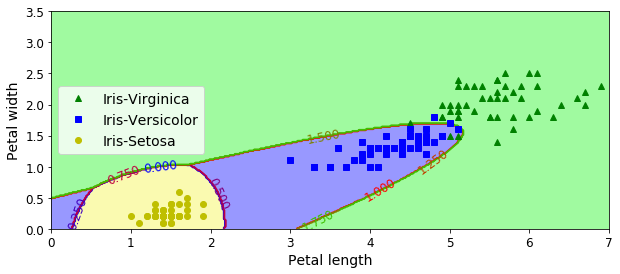

In [30]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_predict = classifier.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.show()

## Nearest Neighbors.

El principio detrás de los métodos del vecino más cercano es encontrar un número predefinido de ejemplos de entrenamiento más cercanos a la distancia al nuevo punto, y predecir la etiqueta a partir de estos. El número de muestras puede ser una constante definida por el usuario (aprendizaje del vecino más cercano a k) o variar según la densidad local de puntos (aprendizaje del vecino basado en el radio). La distancia puede ser, en general, cualquier medida métrica: la distancia euclidiana estándar es la opción más común. Los métodos basados en vecinos se conocen como métodos de aprendizaje automático no generalizados , ya que simplemente "recuerdan" todos sus datos de entrenamiento (posiblemente transformados en una estructura de indexación rápida como un árbol de bolas o un árbol KD ).<a href="https://scikit-learn.org/stable/modules/neighbors.html#classification">[5]</a>


El objetivo de NCA es aprender una matriz de transformación lineal óptima de tamaño , que maximice la suma de todas las muestras. (n_components, n_features)i de la probabilidad $p_i$ ese i Está correctamente clasificado, es decir


$$\underset{L}{\arg\max} \sum\limits_{i=0}^{N - 1} p_{i}$$


con $N= n_samples$ y la probabilidad de muestra  se clasifica correctamente de acuerdo con una regla estocástica de vecinos más cercanos en el espacio incrustado aprendido:
$$p_{i}=\sum\limits_{j \in C_i}{p_{i j}}$$

dónde $C_i$ Es el conjunto de puntos en la misma clase que muestra. i y p_{ij}  es el softmax sobre distancias euclidianas en el espacio incrustado:

$$p_{i j} = \frac{\exp(-||L x_i - L x_j||^2)}{\sum\limits_{k \ne
          i} {\exp{-(||L x_i - L x_k||^2)}}} , \quad p_{i i} = 0$$


Mahalanobis distancia
 
NCA se puede ver como el aprendizaje de una métrica de distancia Mahalanobis (al cuadrado):
$$|| L(x_i - x_j)||^2 = (x_i - x_j)^TM(x_i - x_j)$$
dónde $M=L^TL $Es una matriz de tamaño semi-definida simétrica positiva .(n_features, n_features)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [38]:
# predicting the test set result
y_pred = classifier.predict(x_test)
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

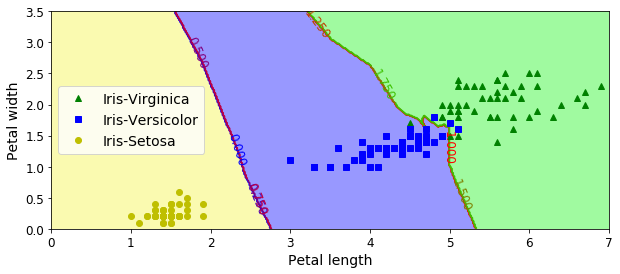

In [40]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_predict = classifier.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.show()